<a href="https://colab.research.google.com/github/lkarjun/savory-unsavory-classifier/blob/master/notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai

     |████████████████████████████████| 197 kB 32.1 MB/s 
     |████████████████████████████████| 60 kB 9.9 MB/s 


In [2]:
from fastai.learner import load_learner
from fastai.vision.all import *

In [6]:
from urllib.request import urlretrieve
from pathlib import Path
urlretrieve("https://github.com/lkarjun/savory-unsavory-classifier/blob/master/Models/model-2022-05-10%2006_45_27.074624.pkl?raw=true", 
              "model.pkl")

('model.pkl', <http.client.HTTPMessage at 0x7fc87146a890>)

In [7]:
learn = load_learner("model.pkl")
model = learn.model

In [14]:
for n,c in model.named_children():
    print("Layer Name: ",n)

Layer Name:  0
Layer Name:  1


In [9]:
class NModel(nn.Module):
  def __init__(self, upto_layer):
    super().__init__()
    self.upto_layer = upto_layer
    self.children_list = []
    for n,c in model.named_children():
      self.children_list.append(c)
      if n == self.upto_layer:
        break

    self.net = nn.Sequential(*self.children_list)
  
  def forward(self, x):
    x = self.net(x)
    return x

In [10]:
img = tensor(Image.open("a.jpg"))
img = (img.permute(2, 0, 1)[None]).float()

img.shape, img.dim()

(torch.Size([1, 3, 915, 731]), 4)

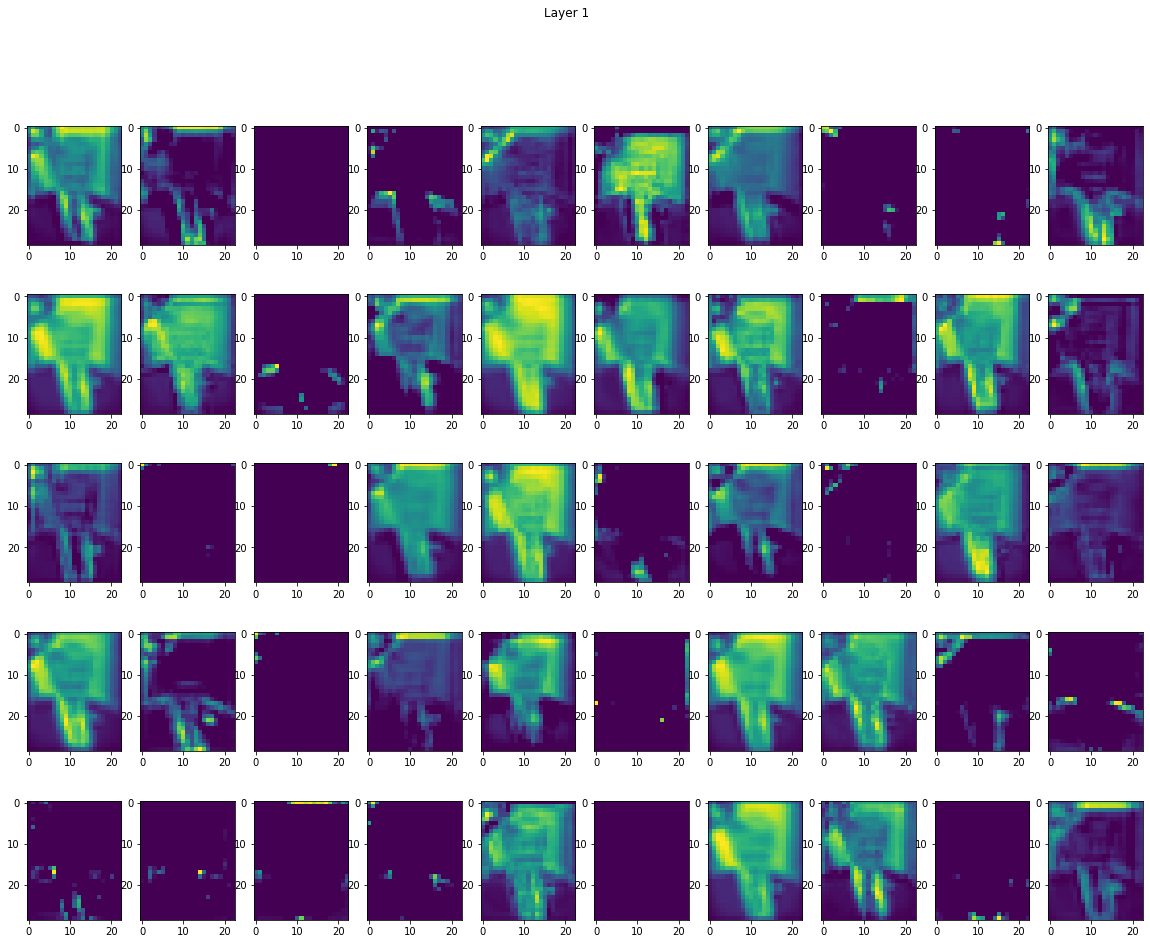

In [12]:
model_ = NModel("0")
rslt = model_(img)
count = 0
fig, ax = plt.subplots(5, 10, figsize=(20, 15))
fig.suptitle(f'Layer 1')
for i in range(5):
  for j in range(10):
    ax[i][j].imshow(rslt[0][count].detach().numpy())
    count += 1